# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
import matplotlib

df = pd.read_csv("day.csv")
df = pd.read_csv("hour.csv")

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

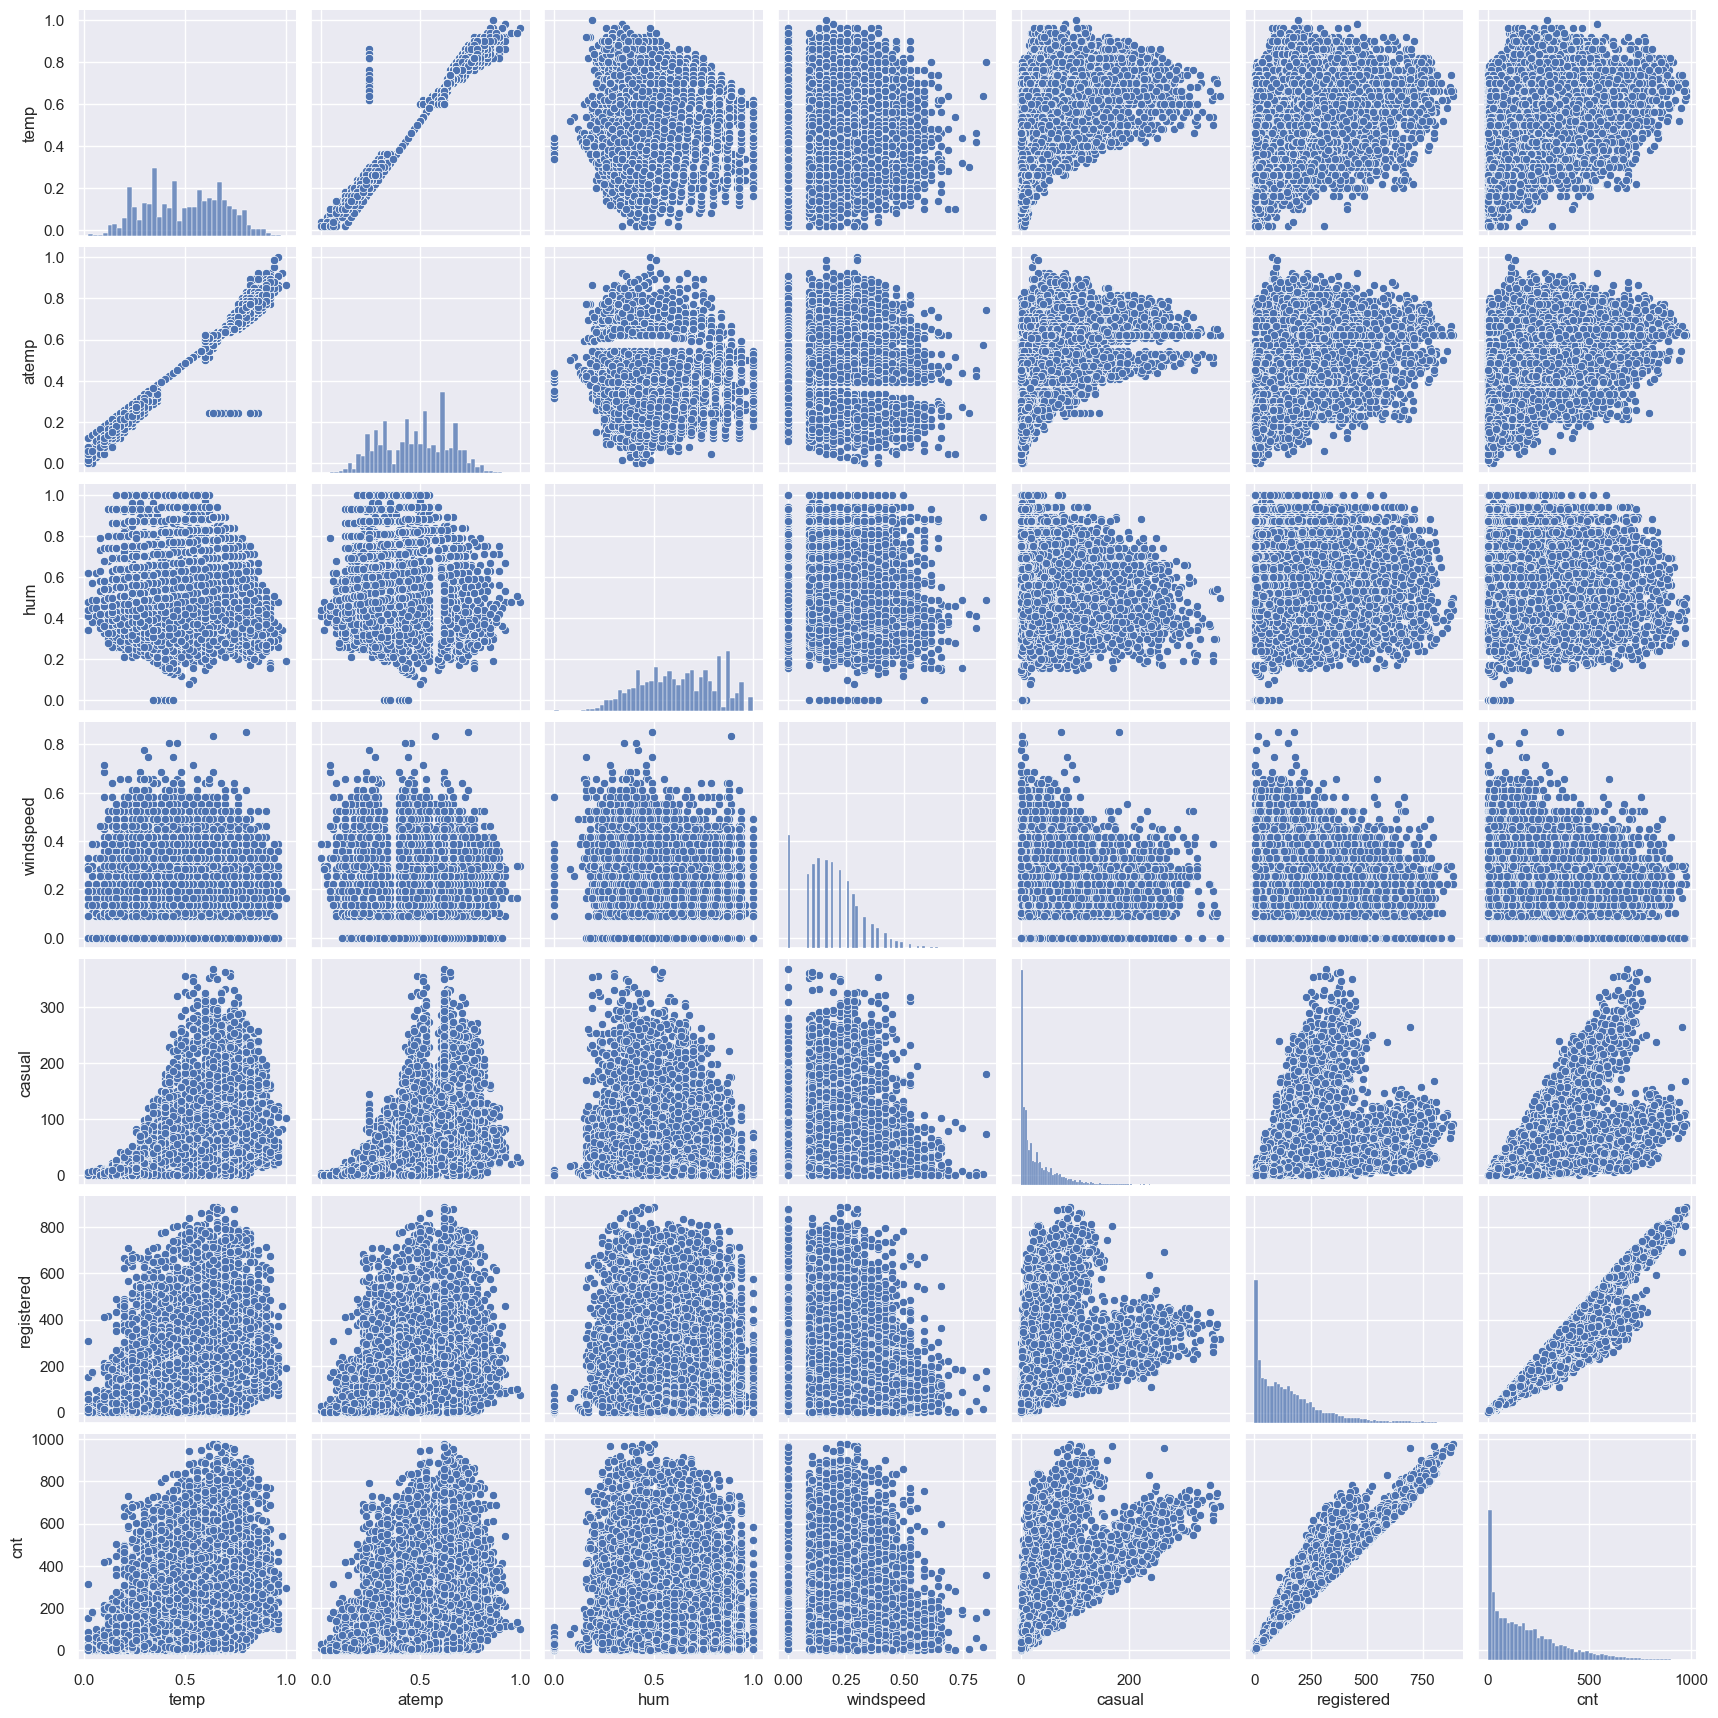

In [4]:
# Some plots for seeing corralation between different factors and number of bike usage

sns.set()
cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
sns.pairplot(df[cols])
plt.show();

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

/var/folders/pk/vvy8906j3h55y2djvr5gmj8r0000gn/T/ipykernel_18636/792307259.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


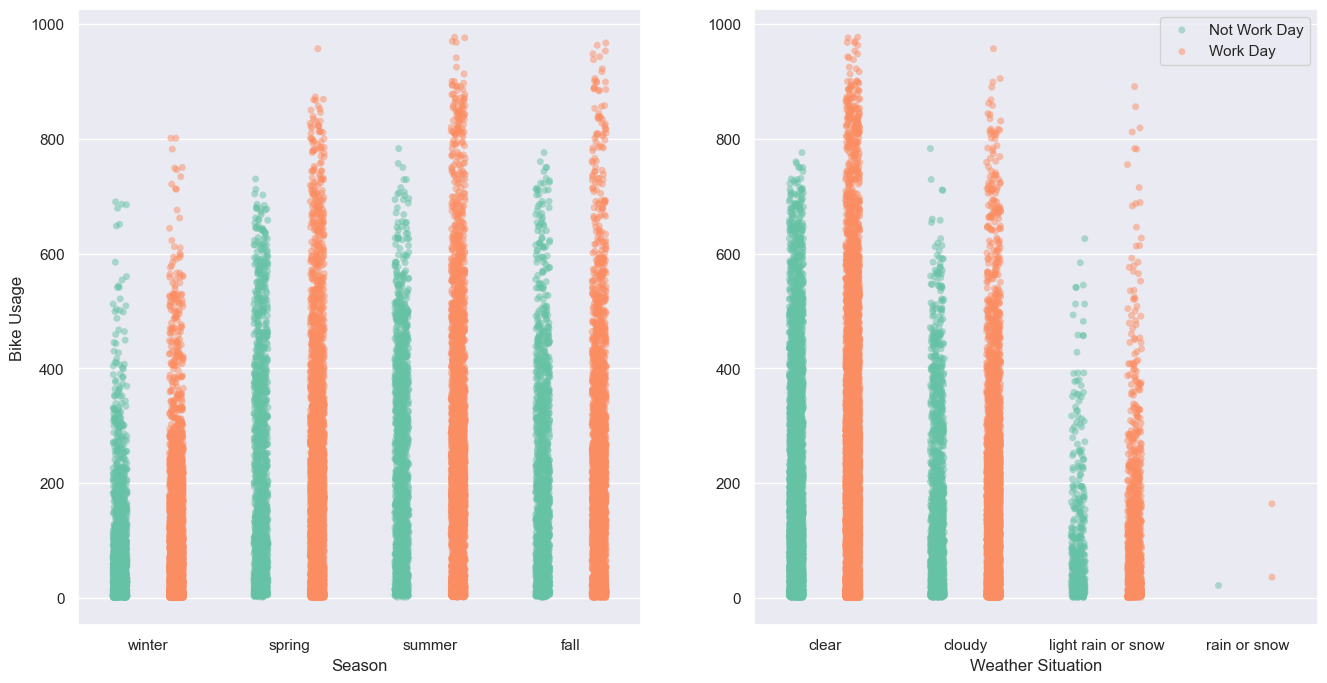

In [5]:
# Two plots for seeing the effect of seasons and wheather situations on bike usage according to work days
fig, ax = plt.subplots(figsize=(16, 8))
plt.subplot(1, 2, 1)
ax = sns.stripplot(x='season', y="cnt", hue="workingday", data=df, palette="Set2", dodge=True, alpha=.5)
ax.set_xticklabels(["winter", "spring", "summer", "fall"])
plt.legend([],[], frameon=False)
plt.xlabel("Season")
plt.ylabel("Bike Usage")
plt.subplot(1, 2, 2)
ax = sns.stripplot(x='weathersit', y="cnt", hue="workingday", data=df, palette="Set2", dodge=True, alpha=.5)
ax.set_xticklabels(["clear", "cloudy", "light rain or snow", "rain or snow"])
plt.legend(labels=['Not Work Day', 'Work Day'])
plt.xlabel("Weather Situation")
plt.ylabel("")
plt.show()

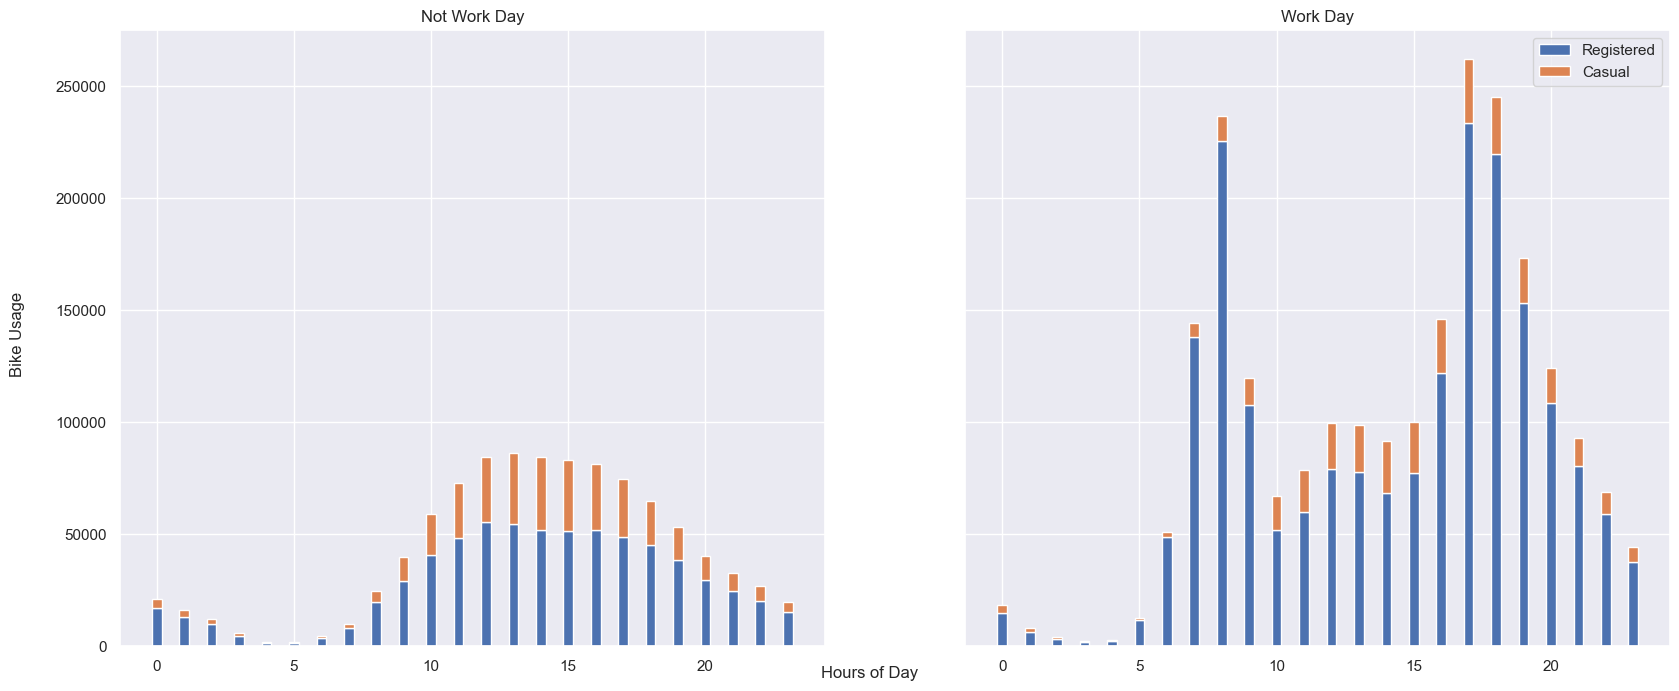

In [7]:
# Two plots to see how registered and casual users act
regis_hour = df[["hr", "workingday", "registered"]].groupby(['hr', "workingday"]).sum().reset_index()
cas_hour = df[["hr", "workingday", "casual"]].groupby(['hr', "workingday"]).sum().reset_index()
 
fig, axs = plt.subplots(1, 2,figsize=(20, 8), sharey=True, sharex=True)
 
axs[0].bar(regis_hour[regis_hour["workingday"]==0]["hr"], 
           regis_hour[regis_hour["workingday"]==0]["registered"], width=0.35 ,  label='Registered')
axs[0].bar(cas_hour[cas_hour["workingday"]==0]["hr"]
           ,cas_hour[cas_hour["workingday"]==0]["casual"],  bottom=regis_hour[regis_hour["workingday"]==0]["registered"]
           , width=0.35 , label='Casual')
axs[0].set_title('Not Work Day')
 
axs[1].bar(regis_hour[regis_hour["workingday"]==1]["hr"],
           regis_hour[regis_hour["workingday"]==1]["registered"], width=0.35 ,  label='Registered')
axs[1].bar(cas_hour[cas_hour["workingday"]==1]["hr"],
           cas_hour[cas_hour["workingday"]==1]["casual"],  bottom=regis_hour[regis_hour["workingday"]==1]["registered"], 
           width=0.35 , label='Casual')
axs[1].set_title('Work Day')
plt.legend()
fig.text(0.5, 0.07, 'Hours of Day', ha='center')
fig.text(0.07, 0.5, 'Bike Usage', va='center', rotation='vertical')
plt.show()

Model Summary:
Intercept: 2.5579538487363607e-13
Coefficients: [1. 1.]


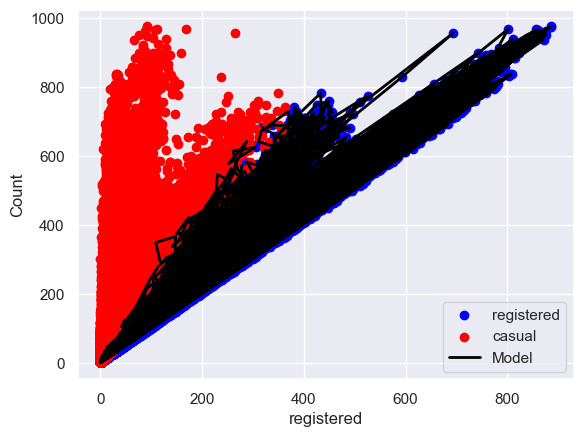

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
df_day = pd.read_csv("day.csv")

# Calculate the correlation matrix
corr_matrix = df_day.corr()

# Find the two columns with the highest correlation (excluding 'count' column)
strongest_corr_cols = corr_matrix['count'].abs().nlargest(3).index[1:3]

# Create the feature matrix X and the target variable y
X = df_day[strongest_corr_cols].values
y = df_day['count'].values

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model summary
print("Model Summary:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Plot the column values and the line produced by the model
plt.scatter(df_day[strongest_corr_cols[0]], y, color='blue', label=strongest_corr_cols[0])
plt.scatter(df_day[strongest_corr_cols[1]], y, color='red', label=strongest_corr_cols[1])
plt.plot(df_day[strongest_corr_cols[0]], model.predict(X), color='black', linewidth=2, label='Model')
plt.xlabel(strongest_corr_cols[0])
plt.ylabel('Count')
plt.legend()
plt.show()

## Error Terms

Finally, plot your error terms!

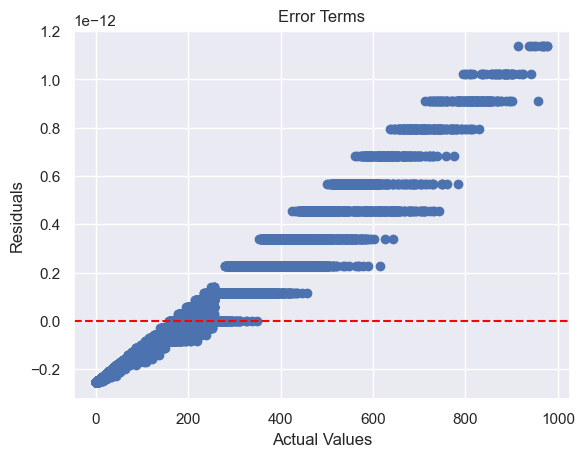

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
df_day = pd.read_csv("day.csv")

# Calculate the correlation matrix
corr_matrix = df_day.corr()

# Find the two columns with the highest correlation (excluding 'count' column)
strongest_corr_cols = corr_matrix['count'].abs().nlargest(3).index[1:3]

# Create the feature matrix X and the target variable y
X = df_day[strongest_corr_cols].values
y = df_day['count'].values

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Calculate the residuals
residuals = y - model.predict(X)

# Plot the error terms (residuals)
plt.scatter(y, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Error Terms')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.638
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Not really